# Lab | Feature engineering

#### Instructions

- Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.
- Check for null values in the numerical columns.

In [24]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
import seaborn as sns

In [2]:
df = pd.read_csv('learningSet.csv')
df

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [4]:
numerical= df.select_dtypes(np.number)
numerical.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0


In [5]:
pd.set_option('display.max_rows', None)

In [6]:
numerical.isna().sum()

ODATEDW         0
TCODE           0
DOB             0
AGE         23665
NUMCHLD     83026
INCOME      21286
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
WEALTH2     43823
POP901          0
POP902          0
POP903          0
POP90C1         0
POP90C2         0
POP90C3         0
POP90C4         0
POP90C5         0
ETH1            0
ETH2            0
ETH3            0
ETH4            0
ETH5            0
ETH6            0
ETH7            0
ETH8            0
ETH9            0
ETH10           0
ETH11           0
ETH12           0
ETH13           0
ETH14           0
ETH15           0
ETH16           0
AGE901          0
AGE902    

- Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
- Use appropriate EDA technique where ever necessary.

In [52]:
df['GEOCODE2'].value_counts()

A        34484
B        28505
D        16580
C        15524
Other      187
O          132
Name: GEOCODE2, dtype: int64

In [53]:
df['GEOCODE2'].fillna('O', inplace=True)

In [54]:
df['GEOCODE2'].value_counts()

A        34484
B        28505
D        16580
C        15524
Other      187
O          132
Name: GEOCODE2, dtype: int64

In [59]:
df['GEOCODE2'] = df['GEOCODE2'].replace('O', 'Other')

In [60]:
df['GEOCODE2'].value_counts()

A        34484
B        28505
D        16580
C        15524
Other      319
Name: GEOCODE2, dtype: int64

In [13]:
df['WEALTH1'].value_counts()

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

In [14]:
df['ADI'].value_counts()

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
197.0    2075
109.0    2054
131.0    1978
67.0     1847
201.0    1772
107.0    1746
275.0    1717
233.0    1676
127.0    1651
329.0    1647
75.0     1588
241.0    1573
15.0     1472
83.0     1305
351.0    1193
111.0    1127
279.0    1075
213.0    1073
59.0     1000
157.0     996
129.0     955
181.0     924
281.0     863
0.0       843
367.0     813
271.0     807
577.0     773
263.0     745
335.0     696
63.0      686
209.0     669
179.0     656
455.0     645
291.0     634
337.0     613
269.0     611
215.0     602
245.0     597
315.0     585
71.0      582
221.0     576
307.0     573
203.0     558
133.0     554
277.0     548
77.0      542
319.0     506
383.0     501
301.0     488
427.0     472
53.0      422
199.0     413
17.0      413
113.0     412
187.0     411
303.0     409
321.0     406
177.0     393
451.0     392
243.0     392
361.0     388
211.0     385
173.0     366
175.0     365
185.0     358
61.0      356
207.0 

In [15]:
df['DMA'].value_counts()

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
539.0    2222
524.0    2079
623.0    2009
862.0    1847
753.0    1780
618.0    1772
613.0    1717
528.0    1651
534.0    1647
820.0    1638
609.0    1583
751.0    1566
825.0    1472
527.0    1316
560.0    1175
617.0    1127
517.0    1085
567.0    1073
563.0    1000
616.0     993
548.0     955
659.0     917
518.0     863
790.0     813
641.0     788
804.0     773
650.0     754
561.0     690
513.0     661
640.0     656
839.0     645
529.0     641
881.0     640
770.0     635
671.0     611
622.0     597
557.0     588
866.0     582
571.0     567
678.0     565
630.0     564
789.0     548
635.0     547
658.0     542
648.0     512
693.0     511
686.0     501
652.0     488
619.0     481
744.0     449
575.0     436
669.0     435
632.0     424
588.0     422
540.0     414
855.0     413
752.0     403
541.0     397
679.0     394
612.0     387
546.0     387
801.0     386
682.0     384
637.0     363
675.0     363
649.0     363
551.0 

In [16]:
df['MSA'].value_counts()

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
6780.0     1525
5945.0     1500
7320.0     1472
7600.0     1457
3360.0     1414
6200.0     1409
8280.0     1378
7040.0     1360
5775.0     1255
1920.0     1217
5120.0     1195
6440.0     1076
7360.0     1046
2080.0      993
7400.0      929
6920.0      894
5000.0      824
3760.0      817
5960.0      791
3480.0      790
2680.0      771
5080.0      745
4120.0      722
1520.0      697
3120.0      691
8960.0      644
7240.0      619
6640.0      592
2800.0      584
3000.0      560
3600.0      543
5360.0      523
5880.0      507
640.0       487
5560.0      478
8520.0      474
3160.0      465
4920.0      456
4520.0      444
7510.0      427
8735.0      415
8200.0      395
7160.0      389
1000.0      387
3840.0      382
8560.0      363
2960.0      354
200.0       353
3320.0      341
2020.0      339
7500.0      334
2840.0      334
5920.0      333
440.0       311
8720.0      298
680.0       288
4900.0      286
2700.0  

In [61]:
df['GEOCODE2'].isna().sum()

0

In [62]:
df['WEALTH1'].isna().sum()

44732

In [63]:
df['ADI'].isna().sum()

132

In [64]:
df['DMA'].isna().sum()

132

In [65]:
df['MSA'].isna().sum()

132

In [66]:
new_df=df[['WEALTH1','DMA','MSA','ADI']]

array([[<Axes: title={'center': 'WEALTH1'}>,
        <Axes: title={'center': 'DMA'}>],
       [<Axes: title={'center': 'MSA'}>, <Axes: title={'center': 'ADI'}>]],
      dtype=object)

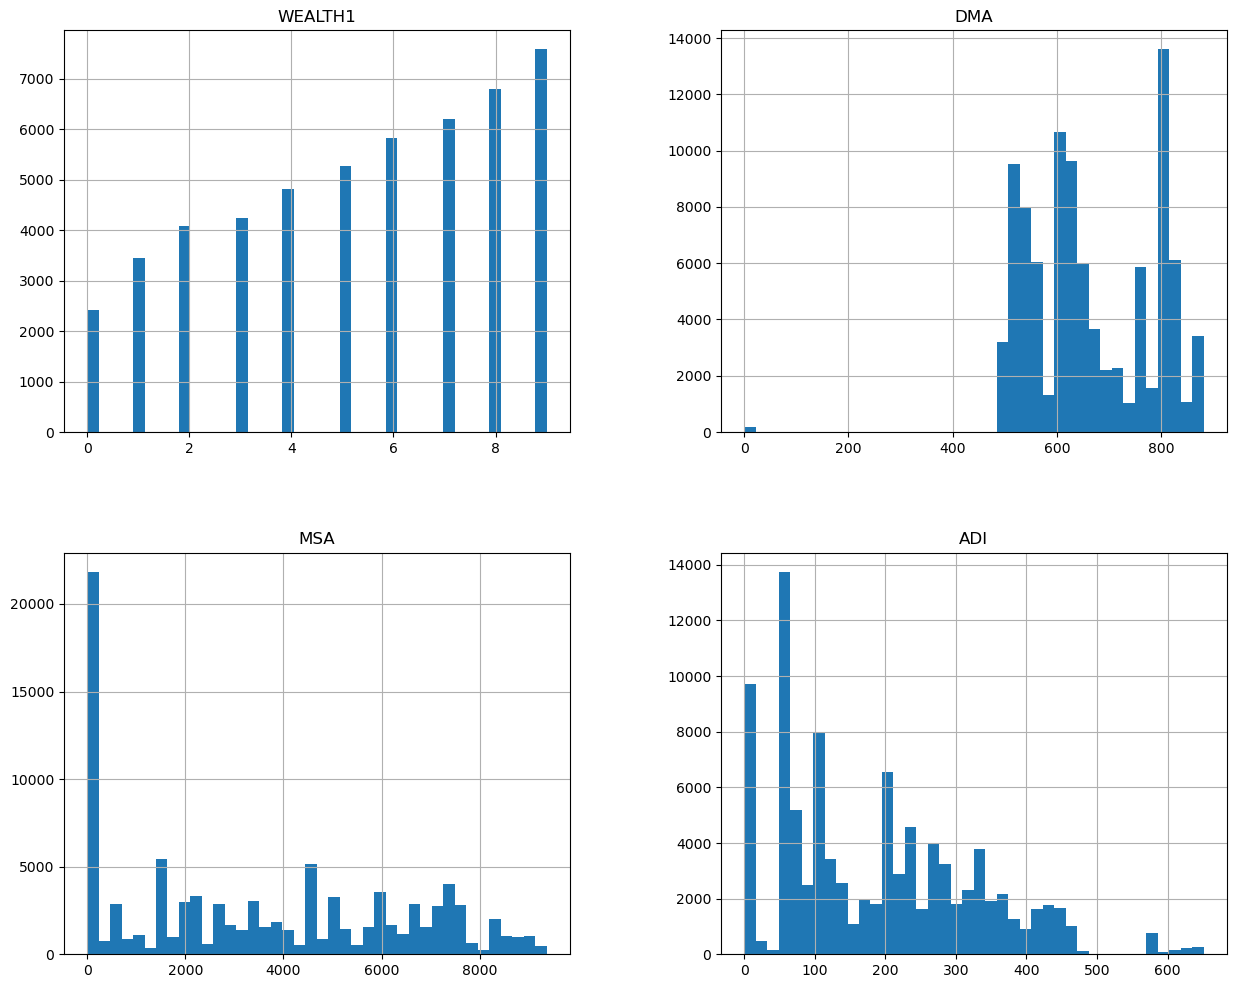

In [67]:
new_df.hist(figsize=(15,12),bins=40)

In [68]:
from sklearn.impute import KNNImputer

In [86]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(new_df)

KNNImputer()

In [90]:
new_df2 = imputer.transform(new_df)

In [92]:
new_df3=pd.DataFrame(new_df2, columns=new_df.columns)

In [93]:
new_df3

,WEALTH1,DMA,MSA,ADI
0,4.4,682.0,0.0,177.0
1,9.0,803.0,4480.0,13.0
2,1.0,518.0,0.0,281.0
3,4.0,862.0,9340.0,67.0
4,2.0,528.0,5000.0,127.0
...,...,...,...,...
95407,4.8,743.0,380.0,0.0
95408,9.0,618.0,3360.0,201.0
95409,5.2,551.0,4040.0,61.0
95410,8.0,803.0,8735.0,13.0


In [94]:
new_df3.isna().sum()

WEALTH1    0
DMA        0
MSA        0
ADI        0
dtype: int64